In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
#Load data
transactions = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/firstfile.csv')
mediaInvestment = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/MediaInvestment.csv')
nps_score = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/MonthlyNPSscore.csv')
#remove sales? Not sure if needed...
sales = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/Sales.csv', sep='\t')

C:\Users\djdit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Load and prep data

In [28]:
#Verify data loaded
transactions.head()

,Unnamed: 0,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical
0,1,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
1,2,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker
2,3,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad
3,4,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl
4,5,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl


In [29]:
# Drop "Unnamed: 0" column because it is duplicate index from source data file
transactions.drop('Unnamed: 0', axis=1, inplace=True)

#Check data types
print("transactions dtypes: \n", transactions.dtypes)

transactions dtypes: 
 Date                    object
Sales_name              object
gmv_new                float64
units                    int64
product_mrp            float64
discount               float64
product_category        object
product_subcategory     object
product_vertical        object
dtype: object


In [30]:
#Convert Date from object to datetime 
transactions['Date'] = pd.to_datetime(transactions['Date'], format='%Y-%m-%d')

In [31]:
#Check column drop and dtype change
transactions.head()

,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical
0,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
1,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker
2,2015-07-01,No Promotion,1999.0,1,7999.0,6000.0,GamingHardware,GamingAccessory,GamePad
3,2015-07-01,No Promotion,139.0,1,700.0,561.0,EntertainmentSmall,TVVideoSmall,RemoteControl
4,2015-07-01,No Promotion,99.0,1,700.0,601.0,EntertainmentSmall,TVVideoSmall,RemoteControl


In [32]:
transactions.dtypes

Date                   datetime64[ns]
Sales_name                     object
gmv_new                       float64
units                           int64
product_mrp                   float64
discount                      float64
product_category               object
product_subcategory            object
product_vertical               object
dtype: object

In [33]:
#Verify data loaded
mediaInvestment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,NaN,NaN
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,NaN,NaN
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,NaN,NaN
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,NaN,NaN
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,NaN,NaN


In [34]:
#Check data types
mediaInvestment.dtypes

Year                   int64
Month                  int64
Total Investment     float64
TV                   float64
Digital              float64
Sponsorship          float64
Content Marketing    float64
Online marketing     float64
 Affiliates          float64
SEM                  float64
Radio                float64
Other                float64
dtype: object

In [35]:
#Merge year and month and format as datetime to be uniform with other tables

mediaInvestment['Date'] = mediaInvestment['Year'].map(str) + "-" + mediaInvestment['Month'].map(str)

#Drop original Date & Month
mediaInvestment.drop('Year', axis=1, inplace=True)
mediaInvestment.drop('Month', axis=1, inplace=True)

In [36]:
#Change new Date column to datetime dtype
mediaInvestment['Date'] = pd.to_datetime(mediaInvestment['Date'], format='%Y-%m')

In [37]:
#Verify merge and drop look correct
mediaInvestment.head()

,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Date
0,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,NaN,NaN,2015-07-01
1,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,NaN,NaN,2015-08-01
2,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,NaN,NaN,2015-09-01
3,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,NaN,NaN,2015-10-01
4,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,NaN,NaN,2015-11-01


In [38]:
#Verify data loaded
nps_score.head()

,Date,NPS
0,7/1/2015,54.6
1,8/1/2015,60.0
2,9/1/2015,46.9
3,10/1/2015,44.4
4,11/1/2015,47.0


In [39]:
#Check data types
nps_score.dtypes

Date     object
NPS     float64
dtype: object

In [40]:
#Change Date from object to datetime
nps_score['Date'] = pd.to_datetime(nps_score['Date'], format='%m/%d/%Y')

In [41]:
#Verify data still looks correct
nps_score.head()

,Date,NPS
0,2015-07-01,54.6
1,2015-08-01,60.0
2,2015-09-01,46.9
3,2015-10-01,44.4
4,2015-11-01,47.0


In [83]:
#Verify data loaded with tab delimiting 
sales.head()

,ID,Date,ID_Order,ID_Item_ordered,GMV,Units_sold,SLA,Product_Category,Analytic_Category,Sub_category,product_analytic_vertical,MRP,Procurement_SLA
0,ACCCX3S58G7B5F6P,17-10-2015 15:11,3.420000e+15,3.420000e+15,6400,1,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,19-10-2015 10:07,1.420000e+15,1.420000e+15,6900,1,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,20-10-2015 15:45,2.420000e+15,2.420000e+15,1990,1,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,14-10-2015 12:05,4.420000e+15,4.420000e+15,1690,1,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,17-10-2015 21:25,4.420000e+15,4.420000e+15,1618,1,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [84]:
sales.dtypes

ID                            object
Date                          object
ID_Order                     float64
ID_Item_ordered              float64
GMV                           object
Units_sold                     int64
SLA                            int64
Product_Category              object
Analytic_Category             object
Sub_category                  object
product_analytic_vertical     object
MRP                            int64
Procurement_SLA                int64
dtype: object

In [85]:
# Copy datetime data to new column so date only can be isolated
sales['Time']= sales['Date']

#Remove time stamp from Date column
sales['Date']= sales['Date'].str.split(" ").str[0]

#Change Date and Time columns to datetime dtypes
sales['Date'] = pd.to_datetime(sales['Date'], format='%d-%m-%Y')

In [86]:
#Check columns were split correctly
sales.head()

,ID,Date,ID_Order,ID_Item_ordered,GMV,Units_sold,SLA,Product_Category,Analytic_Category,Sub_category,product_analytic_vertical,MRP,Procurement_SLA,Time
0,ACCCX3S58G7B5F6P,2015-10-17,3.420000e+15,3.420000e+15,6400,1,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,17-10-2015 15:11
1,ACCCX3S58G7B5F6P,2015-10-19,1.420000e+15,1.420000e+15,6900,1,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,19-10-2015 10:07
2,ACCCX3S5AHMF55FV,2015-10-20,2.420000e+15,2.420000e+15,1990,1,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,20-10-2015 15:45
3,ACCCX3S5AHMF55FV,2015-10-14,4.420000e+15,4.420000e+15,1690,1,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,14-10-2015 12:05
4,ACCCX3S5AHMF55FV,2015-10-17,4.420000e+15,4.420000e+15,1618,1,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,17-10-2015 21:25


In [87]:
sales.dtypes

ID                                   object
Date                         datetime64[ns]
ID_Order                            float64
ID_Item_ordered                     float64
GMV                                  object
Units_sold                            int64
SLA                                   int64
Product_Category                     object
Analytic_Category                    object
Sub_category                         object
product_analytic_vertical            object
MRP                                   int64
Procurement_SLA                       int64
Time                                 object
dtype: object

In [89]:
#Check dimensions of data frames
print(transactions.shape)
print(mediaInvestment.shape)
print(nps_score.shape)
print(sales.shape)

(1578079, 9)
(12, 11)
(12, 2)
(1048575, 14)


In [90]:
#Check for null values
print("transactions nulls: \n", transactions.isnull().sum())
print("\n media nulls: \n", mediaInvestment.isnull().sum(), "\n")
print("\n nps nulls: \n", nps_score.isnull().sum(), "\n")
print("\n sales nulls: \n", sales.isnull().sum())

transactions nulls: 
 Date                   0
Sales_name             0
gmv_new                0
units                  0
product_mrp            0
discount               0
product_category       0
product_subcategory    0
product_vertical       0
dtype: int64

 media nulls: 
 Total Investment     0
TV                   0
Digital              0
Sponsorship          0
Content Marketing    0
Online marketing     0
 Affiliates          0
SEM                  0
Radio                9
Other                9
Date                 0
dtype: int64 


 nps nulls: 
 Date    0
NPS     0
dtype: int64 


 sales nulls: 
 ID                           0
Date                         0
ID_Order                     0
ID_Item_ordered              0
GMV                          0
Units_sold                   0
SLA                          0
Product_Category             0
Analytic_Category            0
Sub_category                 0
product_analytic_vertical    0
MRP                          0
Procurement_SLA 

radio and other nulls are blank in source data. Will replace with 0 for $0 dollars spent since we don't want to drop the row and we want to see if radio or other had impact on sales.

In [91]:
#Replace NaN values with zero 
mediaInvestment['Radio'] = mediaInvestment['Radio'].replace(np.nan, 0)
mediaInvestment['Other'] = mediaInvestment['Other'].replace(np.nan, 0)

In [92]:
#Make sure nulls were converted
print("Media nulls: \n", mediaInvestment.isnull().sum())

Media nulls: 
 Total Investment     0
TV                   0
Digital              0
Sponsorship          0
Content Marketing    0
Online marketing     0
 Affiliates          0
SEM                  0
Radio                0
Other                0
Date                 0
dtype: int64


In [93]:
#Descriptive numerical statistics
transactions.describe()

,gmv_new,units,product_mrp,discount
count,1.578079e+06,1.578079e+06,1.578079e+06,1.578079e+06
mean,2.461679e+03,1.021809e+00,4.257890e+03,1.796212e+03
std,5.640023e+03,2.493014e-01,8.793679e+03,4.276790e+03
min,1.000000e+01,1.000000e+00,4.900000e+01,1.697040e-02
25%,3.390000e+02,1.000000e+00,8.000000e+02,3.100000e+02
50%,7.490000e+02,1.000000e+00,1.600000e+03,7.000000e+02
75%,1.998000e+03,1.000000e+00,3.499000e+03,1.549000e+03
max,2.269470e+05,5.000000e+01,4.200000e+05,4.183530e+05


## EDA

In [94]:
#Object data descriptions
print("date count", transactions.Date.count())
print("date unique count ", transactions.Date.nunique())
print("date range ", transactions.Date.min(), " ", transactions.Date.max(), "\n")


print("sale name count ", transactions.Sales_name.count())
print("sale name unique count ", transactions.Sales_name.nunique())
print("sale name ", transactions.Sales_name.unique(), "\n")

print("Category count ", transactions.product_category.count())
print("Category unique count ", transactions.product_category.nunique(), "\n")
print("Category ", transactions.product_category.unique(), "\n")

print("Subcategory count ", transactions.product_subcategory.count())
print("Subcategory unique count ", transactions.product_subcategory.nunique(), "\n")
print("Subcategory ", transactions.product_subcategory.unique(), "\n")

print("Vertical count ", transactions.product_vertical.count())
print("Vertical unique count ", transactions.product_vertical.nunique())
print("Vertical ", transactions.product_vertical.unique())

date count 1578079
date unique count  360
date range  2015-07-01 00:00:00   2016-06-30 00:00:00 

sale name count  1578079
sale name unique count  13
sale name  ['No Promotion' 'Eid & Rathayatra sale' 'Independence Sale'
 'Rakshabandhan Sale' 'Daussera sale' 'Big Diwali Sale'
 'Christmas & New Year Sale' 'Republic Day' 'BED' "Valentine's Day" 'FHSD'
 'BSD-5' 'Pacman'] 

Category count  1578079
Category unique count  5 

Category  ['EntertainmentSmall' 'GamingHardware' 'CameraAccessory' 'GameCDDVD'
 'Camera'] 

Subcategory count  1578079
Subcategory unique count  14 

Subcategory  ['HomeAudio' 'Speaker' 'GamingAccessory' 'TVVideoSmall' 'CameraStorage'
 'AudioMP3Player' 'Game' 'CameraAccessory' 'Camera' 'AmplifierReceiver'
 'GamingConsole' 'AudioAccessory' 'HomeTheatre' 'GameMembershipCards'] 

Vertical count  1578079
Vertical unique count  72
Vertical  ['HomeAudioSpeaker' 'LaptopSpeaker' 'GamePad' 'RemoteControl'
 'CameraStorageMemoryCard' 'AudioMP3Player' 'SelectorBox' 'PhysicalGame'
 

<AxesSubplot:>

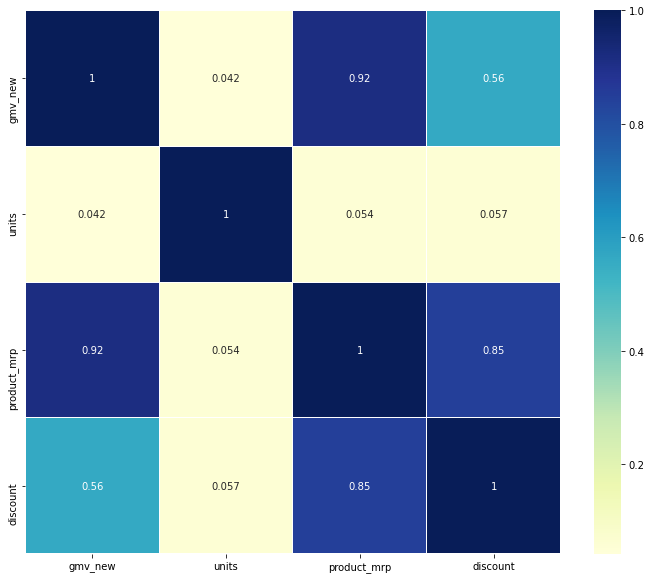

In [108]:
# Check correlation of transactions data
transactions_corr = transactions.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(transactions_corr, cmap='YlGnBu', linewidth=.005, annot=True)

product_mrp is highly correlated with gmv_new (revenue) and discountsince product_mrp = gmv_new + discount. product_mrp may not be used in the regression model to avoid multicolinearity.

<AxesSubplot:>

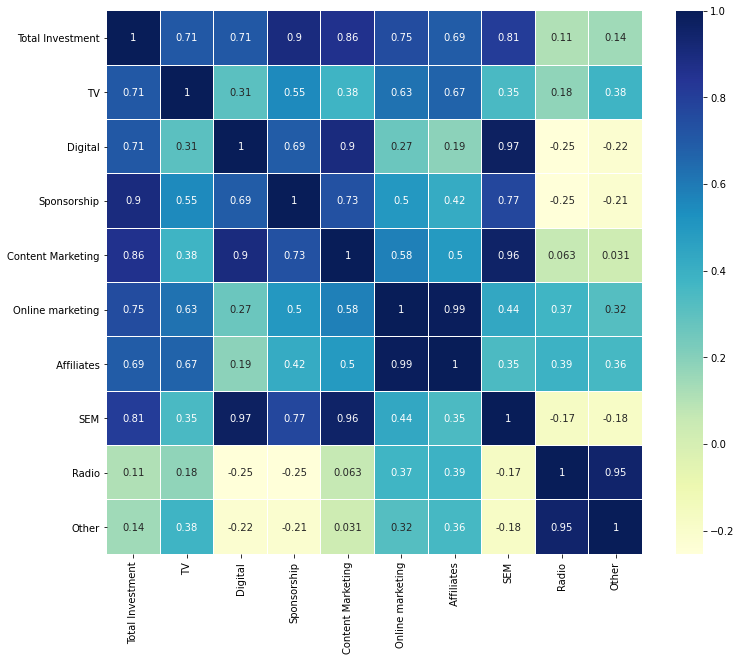

In [25]:
# Check correlation of media investments data
media_corr = mediaInvestment.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(media_corr, cmap='YlGnBu', linewidth=.005, annot=True)

C:\Users\djdit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gmv_new', ylabel='Density'>

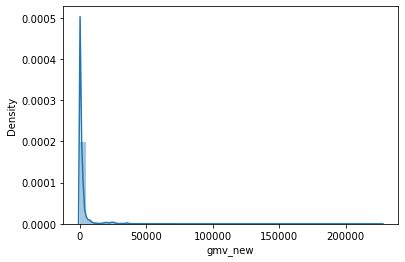

In [99]:
sns.distplot(transactions['gmv_new'])

C:\Users\djdit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gmv_new', ylabel='Density'>

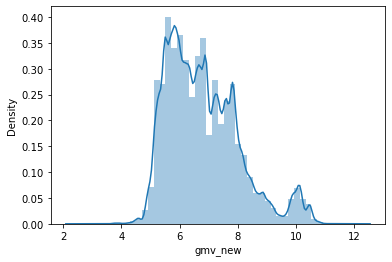

In [102]:
# log transform to see if more normal distribution
target = np.log(transactions['gmv_new'])
sns.distplot(target)

Doesn't fit normality assumption?

In [ ]:
# see if 